In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Zadanie 1 Przekształcenie sfery w elipsoidę
#### 1. Korzystając z równania parametrycznego narysuj sferę jednostkową w 3D

$$ \textbf{v} = \begin{bmatrix}cos(s)sin(t) \\\ sin(s)sin(t) \\\ cos(t)\end{bmatrix}   $$

$$s \in [0, 2\pi], t \in [0, \pi]$$

In [2]:
def draw_sphere(n):
    s = np.linspace(0, 2 * np.pi, n)
    t = np.linspace(0, np.pi, n)
    
    x_func = lambda s, t : np.cos(s) * np.sin(t)
    y_func = lambda s, t : np.sin(s) * np.sin(t)
    z_func = lambda s, t : np.cos(t)
    
    ss, tt = np.meshgrid(s,t)

    x = x_func(ss,tt).flatten()
    y = y_func(ss,tt).flatten()    
    z = z_func(ss,tt).flatten() 
    
    plt.figure(figsize = (10, 10))
    plt.axes(projection="3d").plot3D(x, y, z)
    plt.show()
    return x, y, z




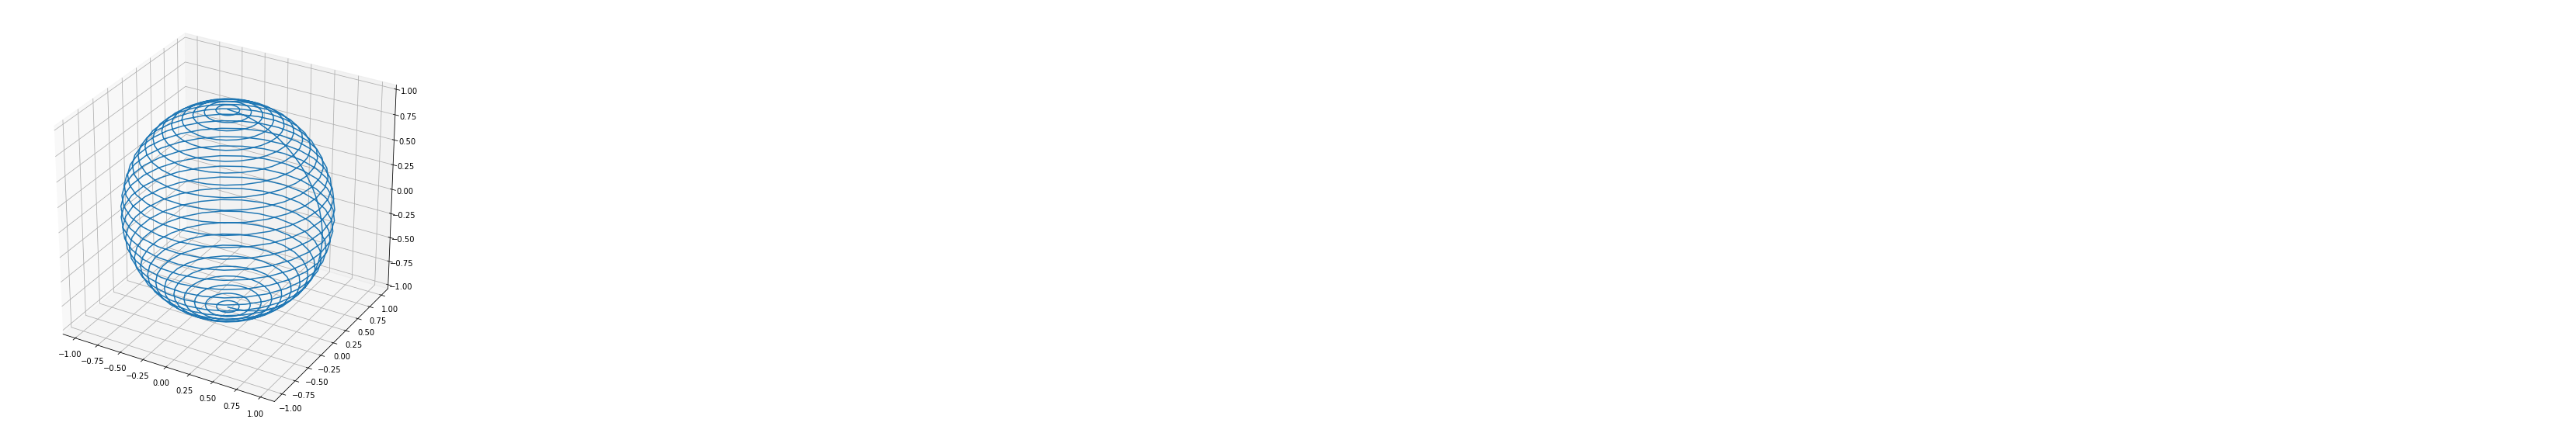

In [3]:
x, y, z = draw_sphere(30)

#### 2. Wygeneruj 3 różne macierze $A1,A2,A3$ gdzie (${A_i} ∈ R 3×3$), za ich pomocą dokonaj przekształcenia sfery w elipsoidę, a następnie przedstaw wizualizację uzyskanego wyniku.

In [4]:
A1 = np.random.rand(3, 3)
A2 = np.random.rand(3, 3)
A3 = np.random.rand(3, 3)

In [5]:
def sphere_to_elipsoid(n,A):
    s = np.linspace(0, 2 * np.pi, n)
    t = np.linspace(0, np.pi, n)
    
    x_func = lambda s, t : np.cos(s) * np.sin(t)
    y_func = lambda s, t : np.sin(s) * np.sin(t)
    z_func = lambda s, t : np.cos(t)
    
    ss, tt = np.meshgrid(s,t)
    
    x = x_func(ss,tt).flatten()
    y = y_func(ss,tt).flatten()    
    z = z_func(ss,tt).flatten() 
    
    cords = np.row_stack([x, y, z])
    result = A @ cords
    
    plt.figure(figsize = (10, 10))
    plt.axes(projection="3d").plot3D(result[0], result[1], result[2])
    plt.show()
    
    return result

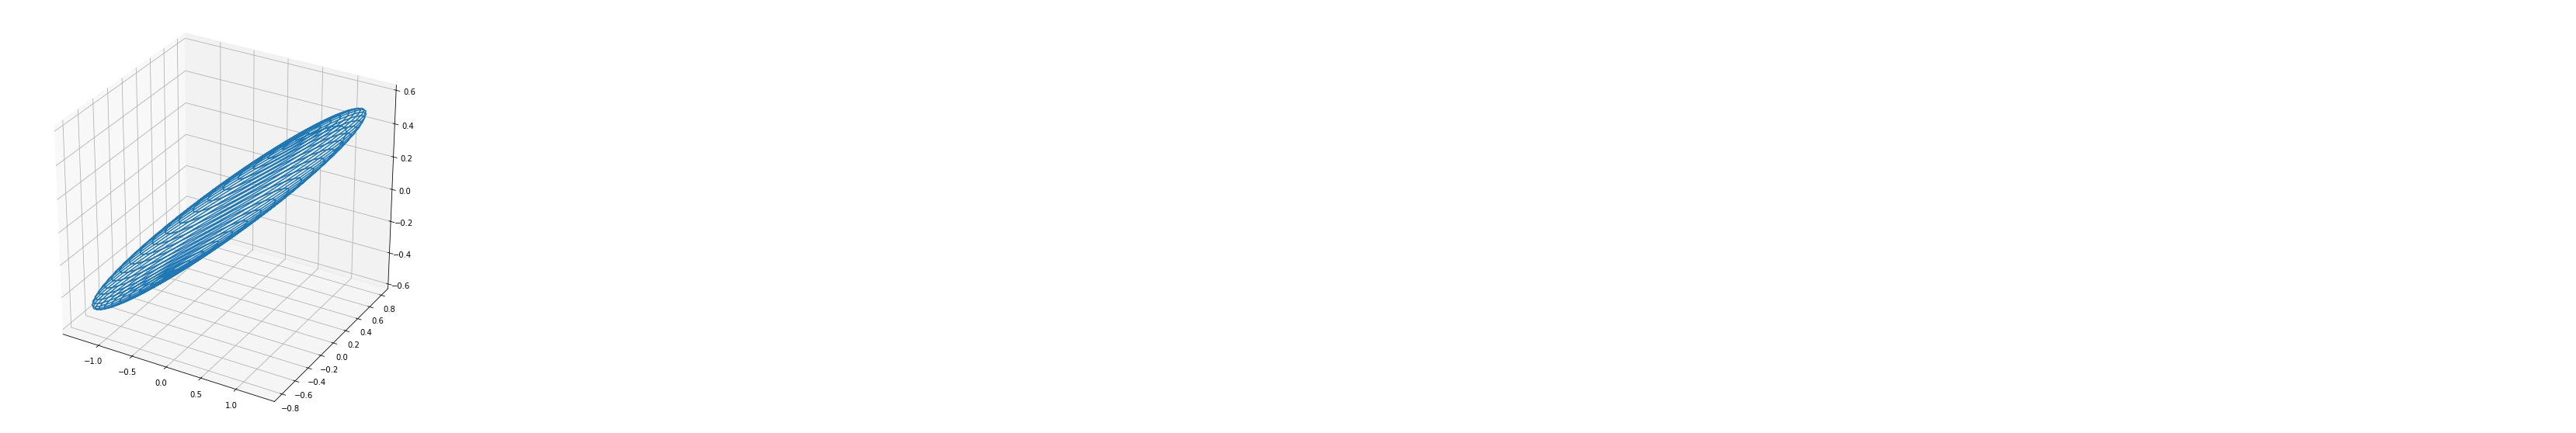

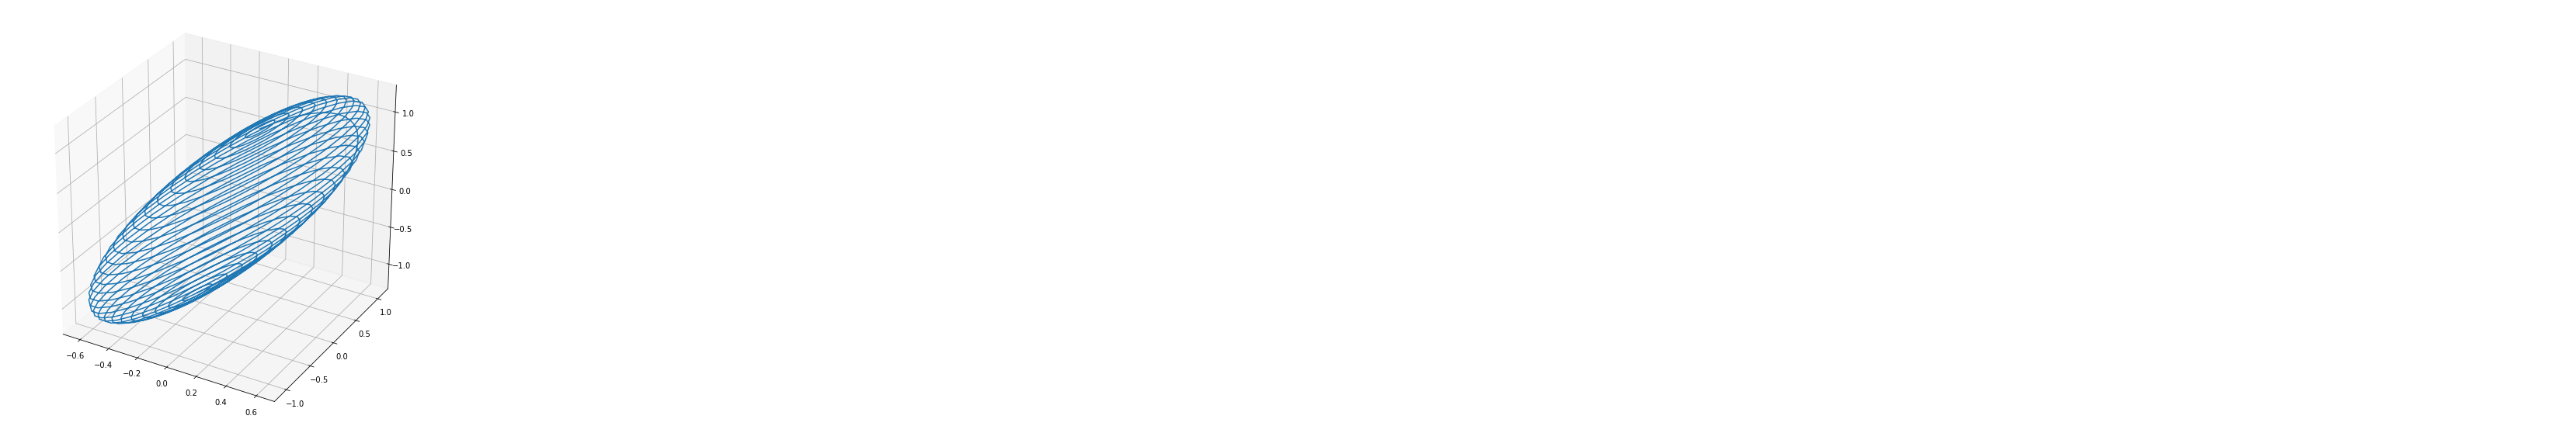

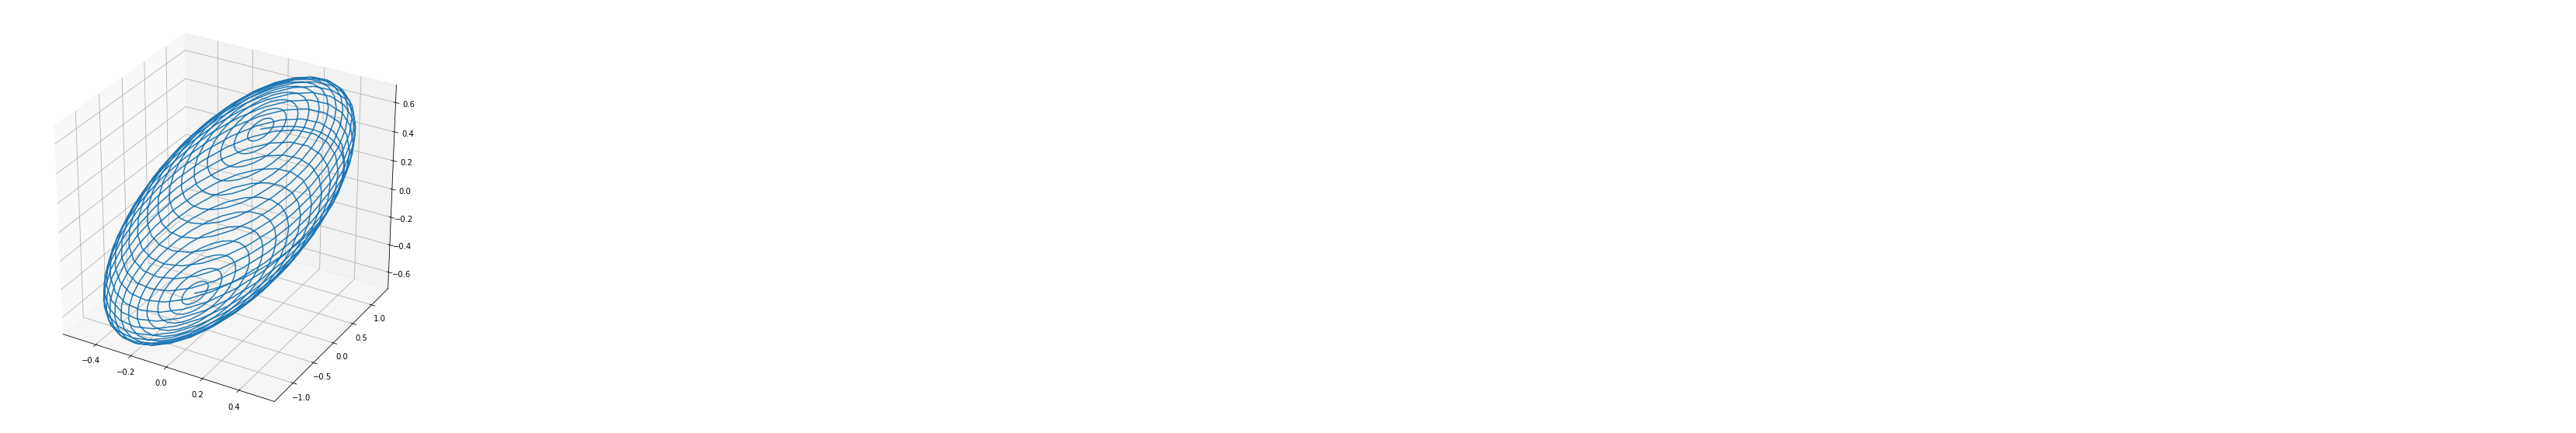

In [6]:
E1 = sphere_to_elipsoid(30,A1)
E2 = sphere_to_elipsoid(30,A2)
E3 = sphere_to_elipsoid(30,A3)

#### 3. Dokonaj rozkładu według wartości osobliwych (SVD) każdej macierzy ${A_i}$. Na wykresie elipsoidy odpowiadającej przekształceniu ${A_i}$ dodaj wizualizację jej półosi wyznaczonych za pomocą SVD.

In [7]:
u1, d1, v1 = np.linalg.svd(A1)
u2, d2, v2 = np.linalg.svd(A2)
u3, d3, v3 = np.linalg.svd(A3)

In [8]:
def draw_svd(U, D, E):
    x_start = y_start = z_start = [[0] * 3] * 3
    x_end = y_end = z_end = [0] * 3

    for i, d in enumerate(np.diag(D)):
        a = np.dot(U, d)
        
        x_end[i] = a[0]
        y_end[i] = a[1]
        z_end[i] = a[2]
        
    quiver1 = [x_start, y_start, z_start, x_end, y_end, z_end]


    fig = plt.figure(figsize = (10, 10))
    ax = fig.gca(projection='3d')
    ax.scatter(x, y, z, marker=".")
    ax.scatter(E[0], E[1], E[2], color='green', marker=".")
    ax.quiver(x_start, y_start, z_start, x_end, y_end, z_end, color='black')
    plt.show()

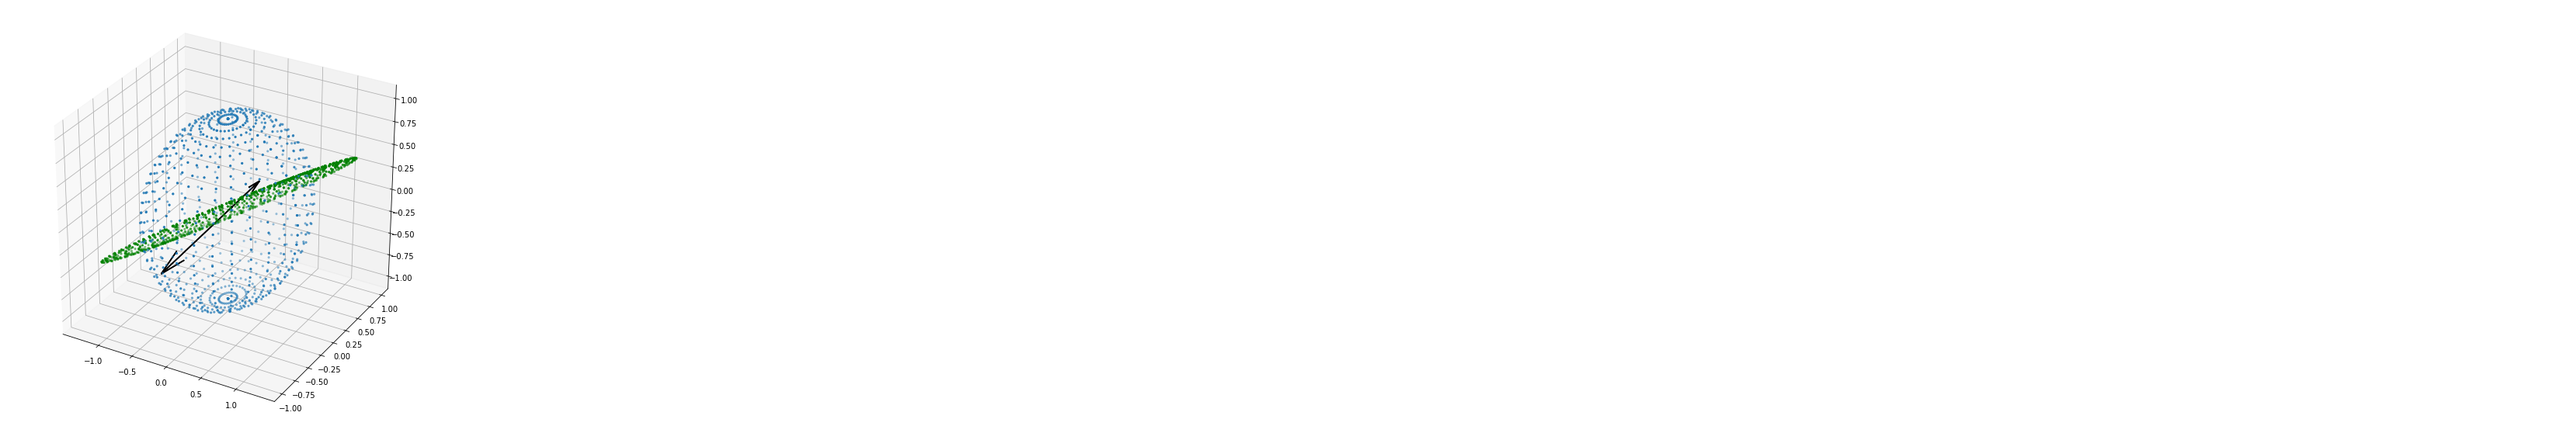

In [9]:
draw_svd(u1,d1,E1)

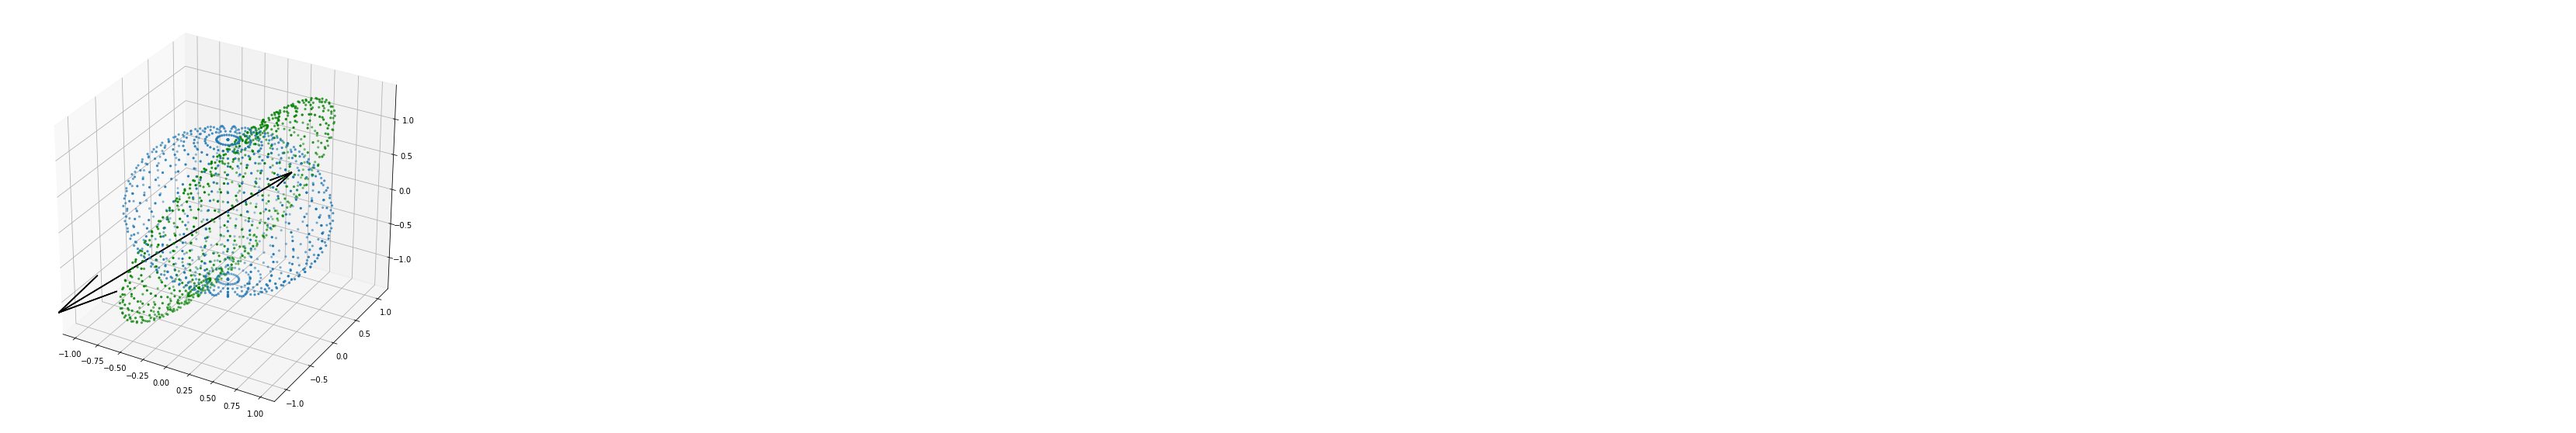

In [10]:
draw_svd(u2,d2,E2)

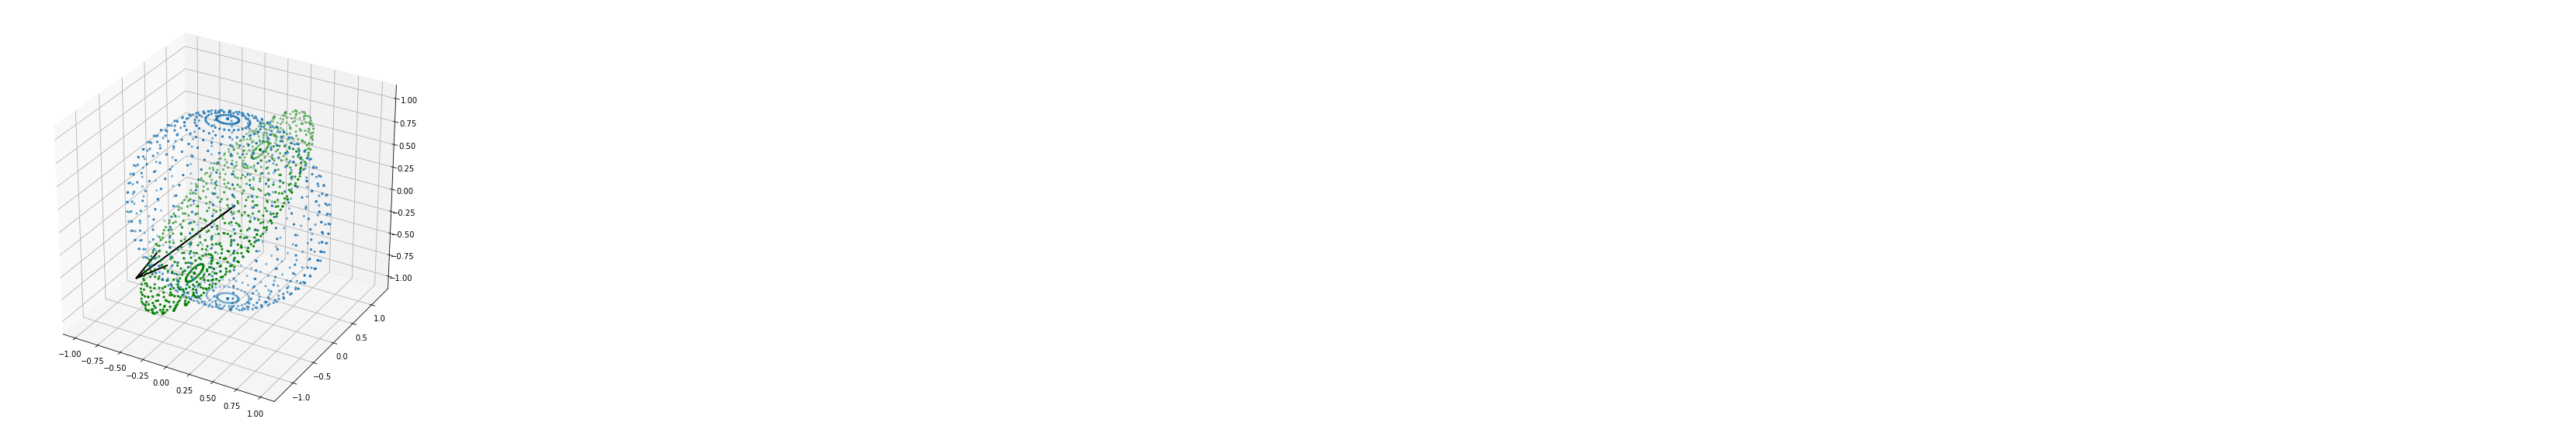

In [11]:
draw_svd(u3,d3,E3)

#### 4. Znajdź taką macierz ${A_i}$, aby stosunek jej największej i najmniejszej wartości osobliwej był większy od 100. Narysuj odpowiadającą jej elipsoidę.

In [12]:
def find_svd():
    result = np.random.rand(3,3)
    U, D, V = np.linalg.svd(result)
    
    while D[0]/D[-1] < 100:
        result = np.random.rand(3,3)
        U, D, V = np.linalg.svd(result)
        
    return result

In [13]:
result = find_svd()
print(result)

[[0.79445955 0.51058163 0.92407075]
 [0.74242477 0.12244096 0.45671753]
 [0.22815829 0.33977612 0.45933911]]


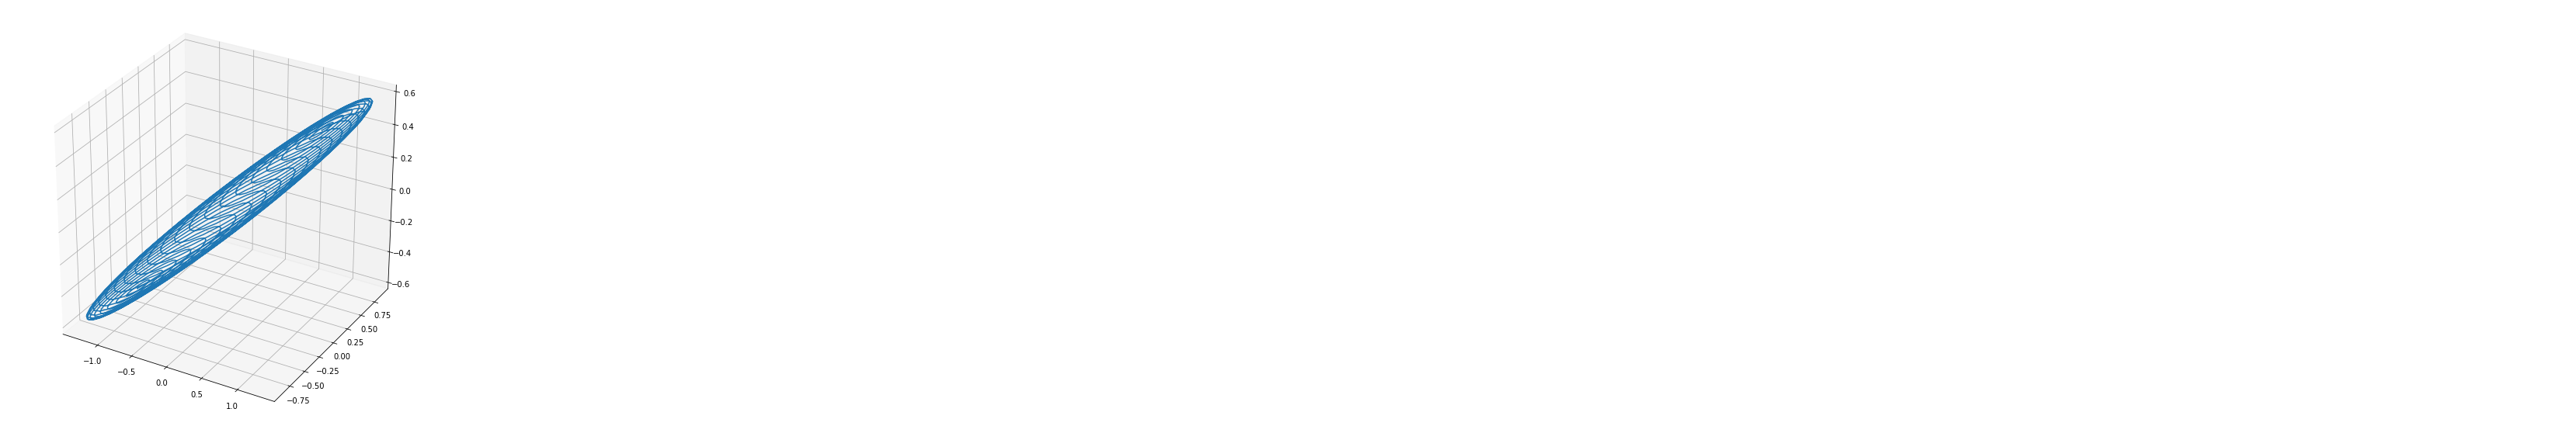

In [14]:
_ = sphere_to_elipsoid(30,result)

#### 5. Dla wybranej macierzy ${A_i}$ przedstaw wizualizacje $S{V_i}^T, S{Σ_i}{V_i}^T$ oraz $S{U_i}{Σ_i}{V_i}^T$ , gdzie ${A_i} = {U_i}{Σ_i}{V_i}^T$ a S oznacza sferę z punktu 1.

In [15]:
U,D,V = np.linalg.svd(A3)

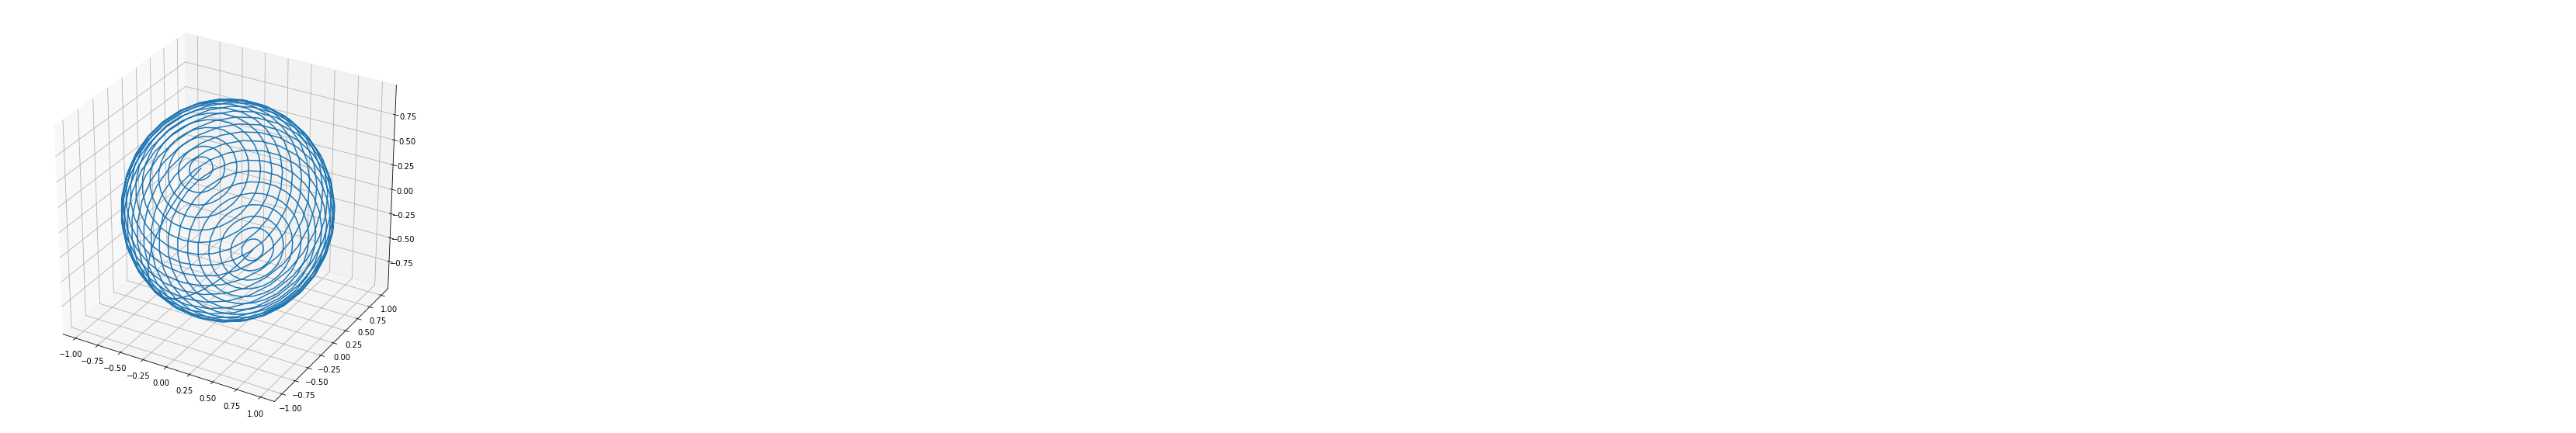

In [16]:
S = np.row_stack([x, y, z])
elipse = V.T @ S

fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")
ax.plot3D(elipse[0], elipse[1], elipse[2])
plt.show()

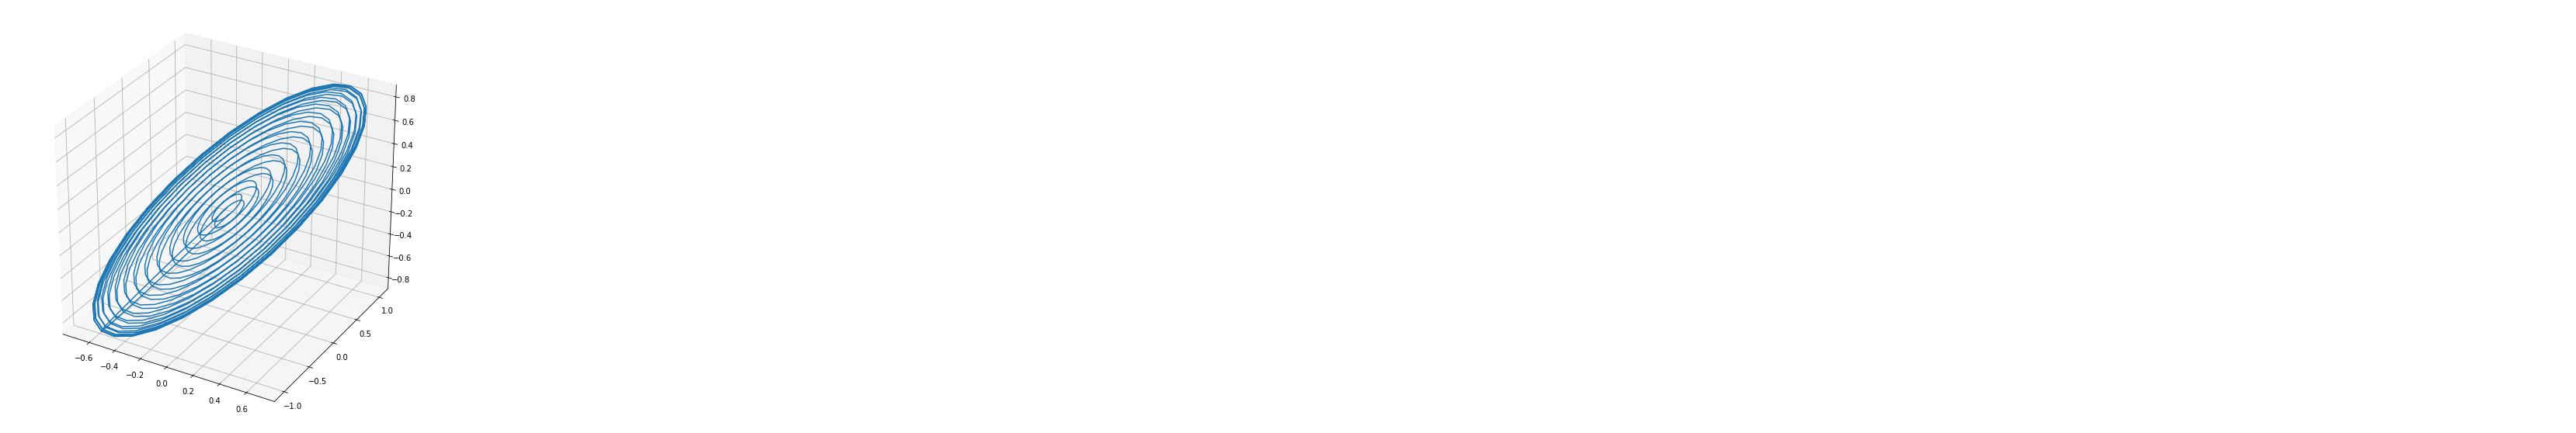

In [17]:
elipse = (S.T * D @ V).T

fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")
ax.plot3D(elipse[0], elipse[1], elipse[2])
plt.show()

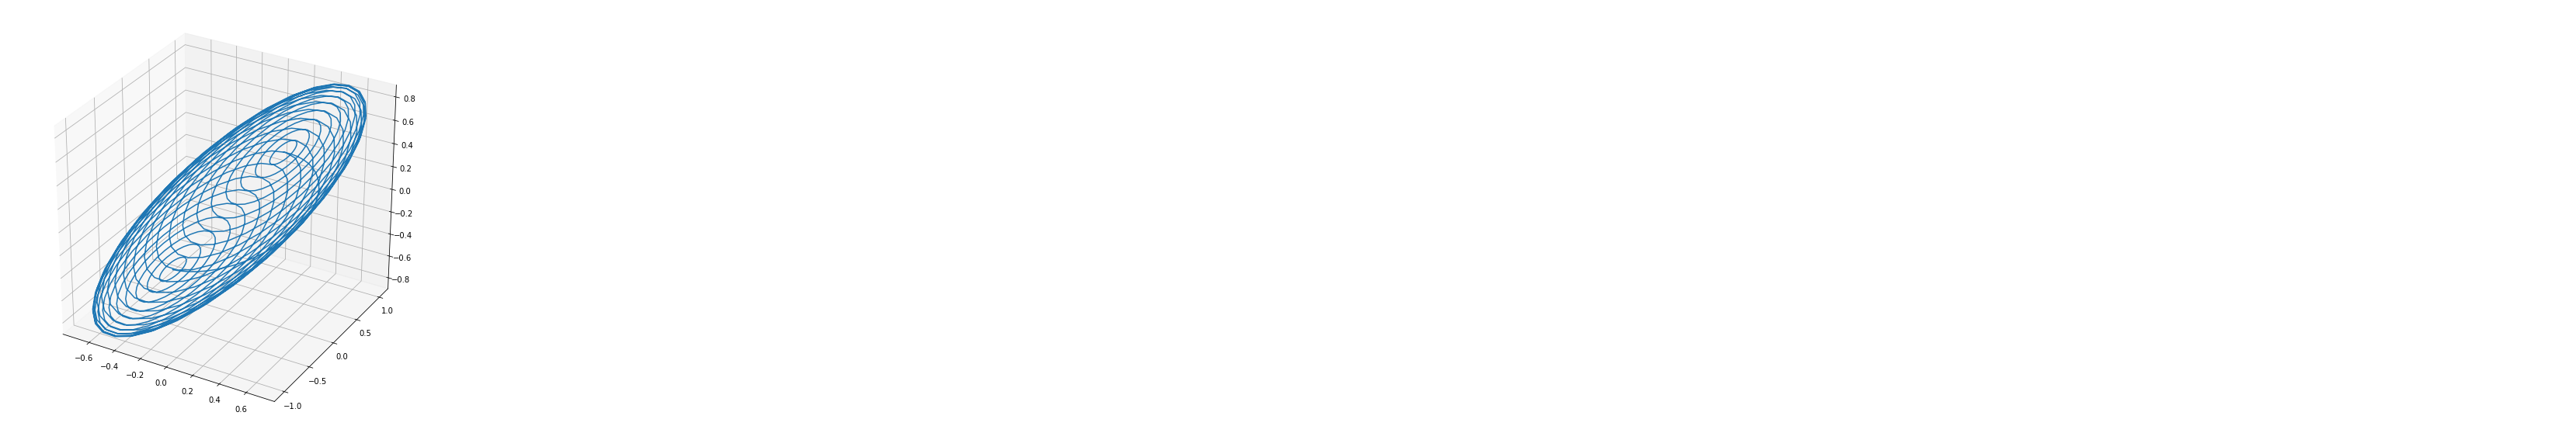

In [18]:
elipse = (S.T @ U * D @ V).T

fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")
ax.plot3D(elipse[0], elipse[1], elipse[2])
plt.show()

### Zadanie 2 Kompresja obrazu
#### 1. Przygotuj przykładowe zdjęcie o rozmiarze 512 × 512 pikseli (np. Lenna image)

<img src="lena512.jpg">

#### 2. Oblicz SVD macierzy pikseli I, a następnie dokonaj przybliżenia tej macierzy za pomocą low rank approximation (k pierwszych wartości osobliwych) uzyskując kompresję obrazu wejściowego. $$I \simeq \sum_{i=1}^{k} {σ_i}{u_i}{v_i}^T$$ 


#### gdzie ${σ_i}$ jest i-tą wartością osobliwą macierzy I, ${u_i}$ jest lewym wektorem osobliwym, a ${v_i}$ - prawym wektorem osobliwym.

In [19]:
import os
import numpy as np
from PIL import Image


def low_rank_approximation(filename):
    path, ext = os.path.splitext(filename)
    img = Image.open(filename)

    img = img.convert('LA')
    img = np.array(list(img.getdata(band=0)), float)
    img.shape = (512, 512)

    X = np.asarray(img)

    U, D, V = np.linalg.svd(X)

    for i in [10, 25, 40, 55, 70, 85,100]:
        img_i = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
        file = path + '-' + str(i) + ext
        img_new = Image.fromarray(np.uint8(img_i))
        img_new.save(file)
        print("zapisuje",i)


low_rank_approximation("lena512.jpg")

ModuleNotFoundError: No module named 'PIL'

low_rank_approximation(10) 
<img src="lena512-10.jpg">
low_rank_approximation(25) 
<img src="lena512-25.jpg">
low_rank_approximation(40) 
<img src="lena512-40.jpg">
low_rank_approximation(55) 
<img src="lena512-55.jpg">
low_rank_approximation(70) 
<img src="lena512-70.jpg">
low_rank_approximation(85) 
<img src="lena512-85.jpg">
low_rank_approximation(100) 
<img src="lena512-100.jpg">